#  CNN 
* load plant seedlings data from [source](https://www.kaggle.com/c/plant-seedlings-classification/data)
* transform data
* build model using capsule networks


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import cv2
from torch.utils.data.sampler import SubsetRandomSampler # random sampler
import numpy as np

#### loading images

In [12]:
file_path = '''..\data\plant-seedlings-classification'''

In [48]:
trans = transforms.Compose([transforms.Resize(255), # resize images to 255 by 255 pixels
                  transforms.CenterCrop(224), # crop the center
                  transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=[60/360,180/360]),
                  transforms.ToTensor()]) # convert them to tensors

In [49]:
num_workers = 0
batch_size = 64
validation_size = 0.3

# train and valid sets
train_set = datasets.ImageFolder(file_path+'\\train',transform=trans) 

In [50]:
num_train = int(np.floor(len(train_set)*(1-validation_size)))
num_valid = int(np.floor(len(train_set)*validation_size))
print(num_valid,num_train)
ids = np.arange(len(train_set))
np.random.shuffle(ids)
# define samplers:
train_ids, validation_ids = ids[:num_train], ids[num_train:] 
print(len(train_ids),len(validation_ids))
train_sampler = SubsetRandomSampler(train_ids)
valid_sampler = SubsetRandomSampler(validation_ids)
# data loader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

1425 3325
3325 1425


In [51]:
for key,value in train_set.class_to_idx.items():
    print(key,value)

Black-grass 0
Charlock 1
Cleavers 2
Common Chickweed 3
Common wheat 4
Fat Hen 5
Loose Silky-bent 6
Maize 7
Scentless Mayweed 8
Shepherds Purse 9
Small-flowered Cranesbill 10
Sugar beet 11


In [52]:
images, labels = dataiter.next()
labels

tensor([10,  1,  7,  5, 10,  3,  9, 11,  0,  1,  4,  2,  8, 10,  1, 11, 11,  8,
         1,  7,  5,  3, 10,  6, 11, 10,  1,  6,  7,  8,  8,  6,  6,  3, 10,  8,
         2,  5,  9,  6,  6,  9,  6,  8,  6,  5,  4,  3,  3,  3,  3,  7,  6,  0,
         5,  3,  0,  5,  0,  4,  0,  3,  6,  3])

(64, 3, 224, 224)


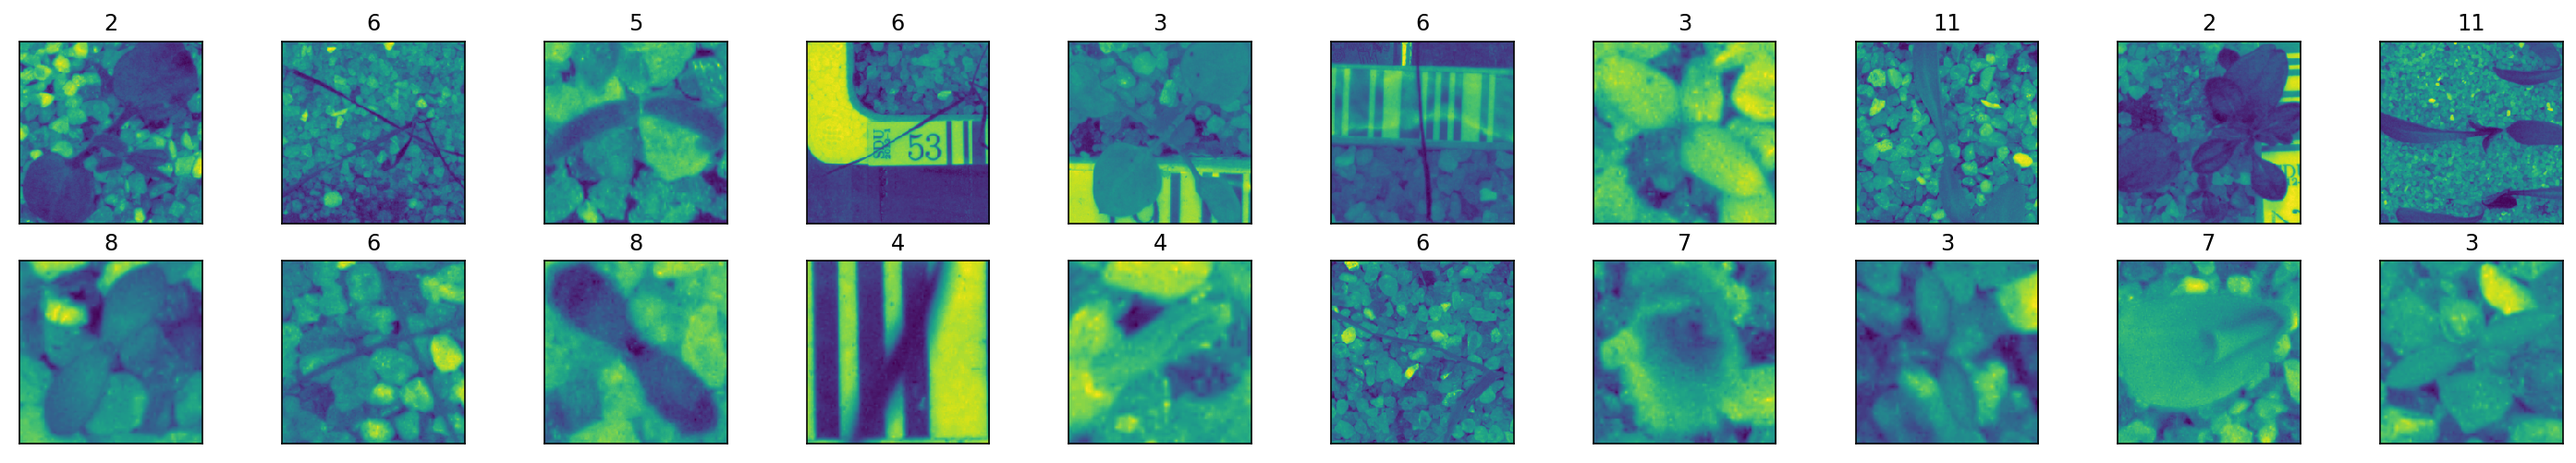

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
dataiter = iter(train_loader)
images, labels = dataiter.next() # get the batch
images = images.numpy() # convert to numpy
print(images.shape)
fig = plt.figure(figsize = (25,4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i,1]))
    ax.set_title(labels[i].item())

In [38]:
labels

tensor([ 4,  8,  3,  6,  5,  3,  1,  0,  4,  8,  8,  7,  4,  1,  8,  6,  3,  7,
         1,  4,  6, 10,  8,  8, 10,  7, 11,  7,  6,  6,  8, 10,  5,  0,  2,  8,
         7,  8,  3, 10,  1, 11, 11,  1,  8,  5,  3,  6,  9,  5, 11,  5,  3,  8,
         4,  6,  0,  1, 10,  6,  1,  1,  7,  7])